# 端到端的机器学习项目实例

《机器学习实战：基于Scikit-Learn，Keras和TensorFlow》中第一章内容，英文代码可参考[github - handson-ml2/02_end_to_end_machine_learning_project.ipynb](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)

## 数据集预处理

数据集下载位置：https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz

将 `housing.tgz` 文件放到 `./datasets/housing` 下.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import tarfile

DATASETS_ROOT = r"https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets"
HOUSING_PATH = Path.cwd().joinpath('./datasets/housing')
HOUSING_URL = DATASETS_ROOT + "/housing/housing.tgz"
print('数据集路径:', HOUSING_PATH)

def fetch_housing_data(url=HOUSING_URL, path=HOUSING_PATH):
    path.mkdir(parents=True, exist_ok=True)  # 创建本地目录
    save_path = path.joinpath('housing.tgz')  # 保存路径
    housing_tgz = tarfile.open(save_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()
    
fetch_housing_data()

数据集路径: D:\yy\DeepLearning\ml-scikit-keras-tf2\datasets\housing


In [2]:
def load_housing_data(path=HOUSING_PATH):
    csv_path = path.joinpath('housing.csv')
    return pd.read_csv(csv_path)

df = load_housing_data()

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


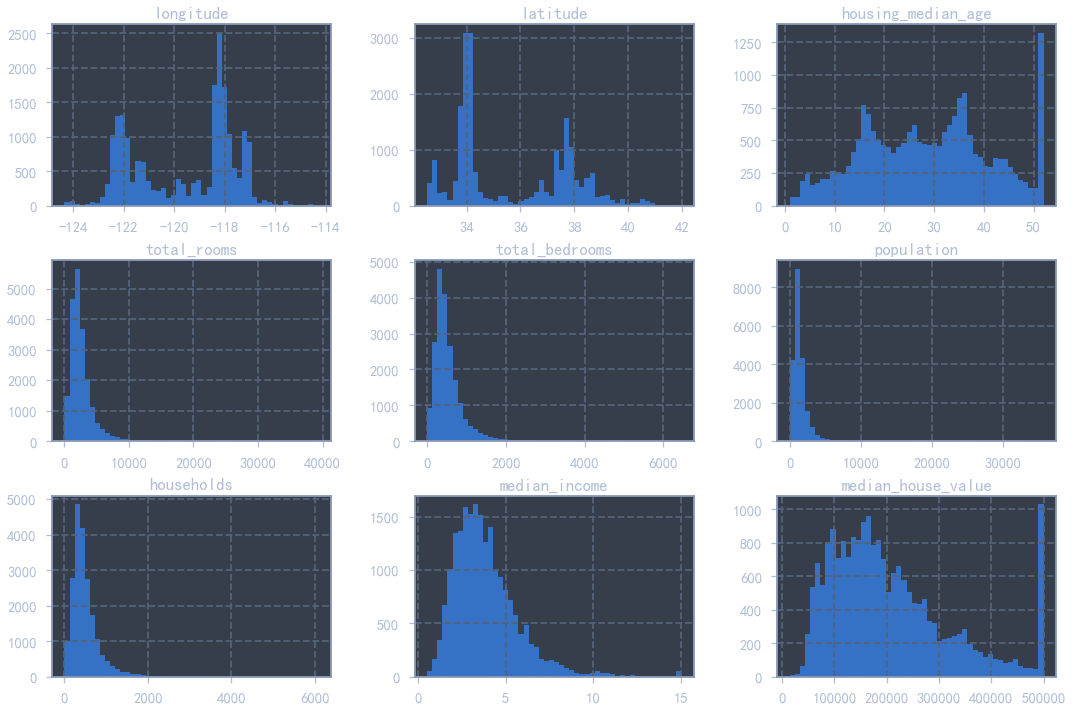

In [7]:
df.hist(bins=50, figsize=(18, 12))
plt.show()

In [8]:
np.random.seed(42)  # 固定初始随机种子
def split_train_test(df, test_ratio):
    shuffled_indices = np.random.permutation(len(df))
    test_size = int(len(df) * test_ratio)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    return df.iloc[train_indices], df.iloc[test_indices]

train_df, test_df = split_train_test(df, 0.2)
print('训练集大小:', len(train_df), '测试集大小:', len(test_df))

训练集大小: 16512 测试集大小: 4128


### 两种划分训练集与测试集的方法 

1. 使用上述方式，确定随机种子后，可以保证对于同一数据集的随机结果保持相同，但缺点是如果加入新的数据，划分出的训练集与测试集内容可能完全不同.

2. 利用每个样本的Hash值，作为划分标准，一个样本的Hash值需要是该样本的唯一标识符，例如：“索引”，“房产的经纬度”

In [9]:
# 利用Hash值进行划分
from zlib import crc32

def test_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  # 左侧为使用crc32计算出的Hash值

def split_train_test_by_hash(df, test_ratio, id_column):
    ids = df[id_column]
    is_test = ids.apply(lambda id_: test_check(id_, test_ratio))
    return df.loc[~is_test], df.loc[is_test]

df_idx = df.reset_index()
train, test = split_train_test_by_hash(df_idx, 0.2, 'index')
print('训练集大小:', len(train_df), '测试集大小:', len(test_df))

训练集大小: 16512 测试集大小: 4128


### 使用Scikit-Learn中的方法对数据进行划分

1. 设定随机种子进行均匀划分，`train_test_split(df, test_size=0.2, random_state=42)`：df为数据集，test_size为测试集比例，random_state为随机种子.

2. 分层划分数据集，由于测试集需要代表整个数据集的整体信息，首先对数据特征进行层划分，在每一层中，我们希望都要有足够的信息来表示这种类别，表示该层的重要程度.

首先利用 `pd.cut()` 对层进行划分，例如划分为 $[0, 1.5, 3, 4.5, 6, \infty]$ 这样 $5$ 段.

再使用Scikit中的api函数实例化划分模型 `split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)`：`n_splits` 表示划分的总数据集个数，`test_size` 为测试集占比，`random_state` 表示随机种子.

最后通过迭代方式生成训练集与测试集：`train_idx, test_idx = next(split.split(df, df['income_cat']))`（由于只生成一个数据集，所以可以直接用next获取第一个迭代结果）

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print('训练集大小:', len(train_df), '测试集大小:', len(test_df))

训练集大小: 16512 测试集大小: 4128


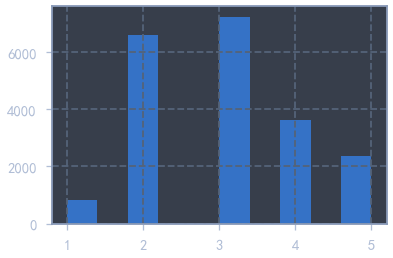

In [11]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist()
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_idx, test_idx in split.split(df, df['income_cat']):
train_idx, test_idx = next(split.split(df, df['income_cat']))
strat_train = df.loc[train_idx]
strat_test = df.loc[test_idx]

strat_income_ratio = strat_test['income_cat'].value_counts() / len(strat_test)
base_income_ratio = df['income_cat'].value_counts() / len(df)
test_income_cate = pd.cut(test['median_income'], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])
random_income_ratio = test_income_cate.value_counts() / len(test)

In [13]:
def calc_error(base, x):
    return (x - base) / base * 100
diff_test_sample = pd.concat([base_income_ratio, strat_income_ratio, random_income_ratio,
                              calc_error(base_income_ratio, strat_income_ratio),
                              calc_error(base_income_ratio, random_income_ratio)], axis=1)
diff_test_sample.columns = ['Overall', 'Stratified', 'Random', 'Strated error %', 'Random error %']
diff_test_sample = diff_test_sample.sort_index()
diff_test_sample

,Overall,Stratified,Random,Strated error %,Random error %
1,0.039826,0.039971,0.040213,0.364964,0.973236
2,0.318847,0.318798,0.324370,-0.015195,1.732260
3,0.350581,0.350533,0.358527,-0.013820,2.266446
4,0.176308,0.176357,0.167393,0.027480,-5.056334
5,0.114438,0.114341,0.109496,-0.084674,-4.318374


In [14]:
# 删除income_cat该列
for ds in (strat_train, strat_test):
    ds.drop('income_cat', axis=1, inplace=True)

### 数据集可视化

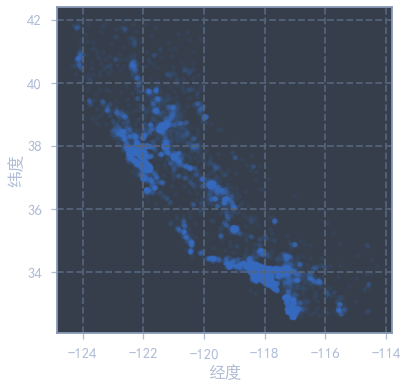

In [15]:
df = strat_train.copy()
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, xlabel='经度', ylabel='纬度', figsize=(6, 6), c='b')
plt.show()

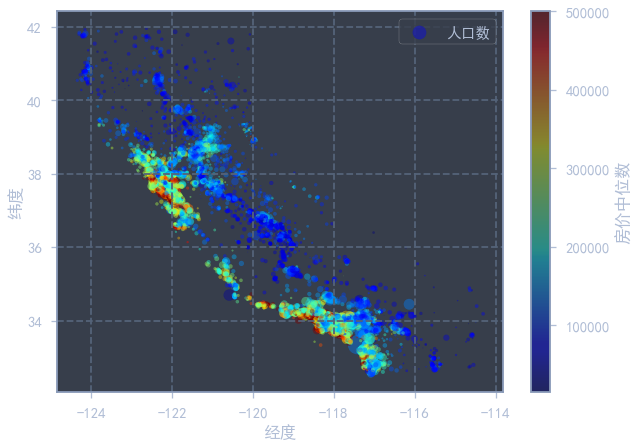

In [16]:
import matplotlib as mpl
ax = df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='人口数', figsize=(10, 7),
        c='median_house_value', cmap='jet', colorbar=False,
        xlabel='经度', ylabel='纬度')
ax.figure.colorbar(plt.cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=df['median_house_value'].min(), vmax=df['median_house_value'].max()), cmap='jet'),
    label='房价中位数', alpha=0.4)
plt.legend()
plt.show()

### 数据相关性

In [17]:
# Pearson's correlation coefficient
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

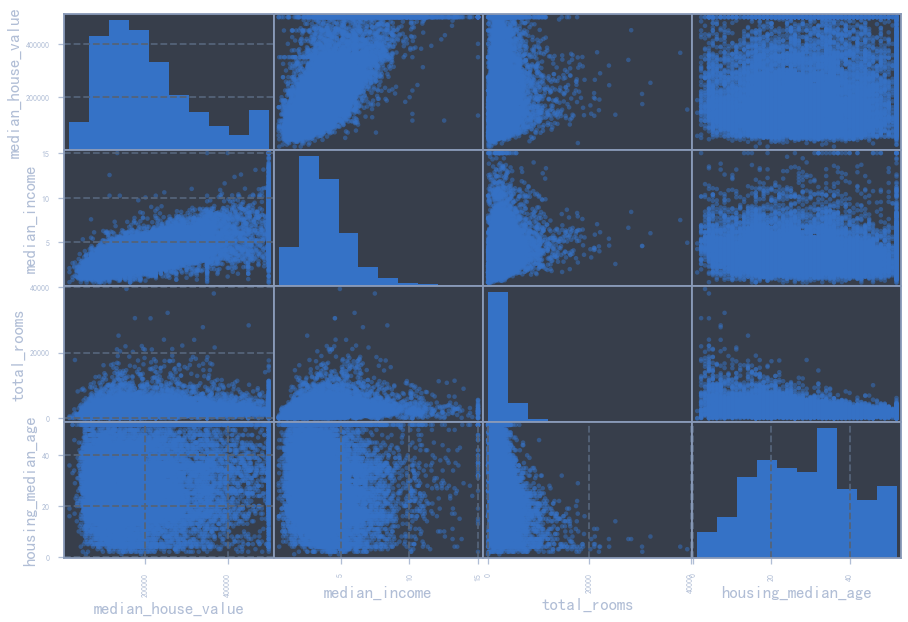

In [18]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(15, 10))
plt.show()

### 数据清理

In [19]:
df_x = strat_train.drop('median_house_value', axis=1)
df_y = strat_train['median_house_value'].copy()
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [20]:
df_x[df_x['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [21]:
df_x.fillna(0).loc[1606]

longitude              -122.08
latitude                 37.88
housing_median_age        26.0
total_rooms             2947.0
total_bedrooms             0.0
population               825.0
households               626.0
median_income            2.933
ocean_proximity       NEAR BAY
Name: 1606, dtype: object

In [22]:
# 使用Scikit-Learn中的填补方式
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # 利用每列的中位数进行填补
df_num = df_x.drop('ocean_proximity', axis=1)
train_x = imputer.fit_transform(df_num)
train_x.shape

(16512, 8)

In [23]:
df_cat = df_x[['ocean_proximity']]
print(df_cat.shape)
df_cat.head(10)

(16512, 1)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [24]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [25]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
df_cat_onehot = onehot_encoder.fit_transform(df_cat)
df_cat_onehot[:10].toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### 自定义转化器

通过该转化器可以为特征(Character)增加新的属性(Attribute)：

1. 每户平均所用房间数: `rooms_per_households`.

2. 每户平均人口数：`population_per_households`.

3. 每间房的平均卧室数：`bedrooms_per_rooms`. （可选是否添加）

所需列的索引编号分别有 `total_rooms, total_bedrooms, population, households`

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributersAdder(BaseEstimator, TransformerMixin):
    def __init__(self, idxs, add_bedrooms_per_rooms=True):
        self.idxs = idxs
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_households = (X[:, self.idxs['total_rooms']] / X[:, self.idxs['households']]).reshape([-1,1])
        population_per_households = (X[:, self.idxs['population']] / X[:, self.idxs['households']]).reshape([-1,1])
        ret = [X, rooms_per_households, population_per_households]
        if self.add_bedrooms_per_rooms:
            ret.append((X[:, self.idxs['total_bedrooms']] / X[:, self.idxs['total_rooms']]).reshape([-1,1]))
        return np.concatenate(ret, axis=1)

idxs = dict([(col, i) for i, col in enumerate(df_x.columns)])
attr_adder = CombinedAttributersAdder(idxs, add_bedrooms_per_rooms=False)
df_extra_attribs = attr_adder.fit_transform(df_x.values)
df_extra_attribs.shape

(16512, 11)

In [27]:
attr_adder.set_params(add_bedrooms_per_rooms=False)
attr_adder.get_params()

{'add_bedrooms_per_rooms': False,
 'idxs': {'longitude': 0,
  'latitude': 1,
  'housing_median_age': 2,
  'total_rooms': 3,
  'total_bedrooms': 4,
  'population': 5,
  'households': 6,
  'median_income': 7,
  'ocean_proximity': 8}}

### 特征缩放

1. 归一化 `MinMaxScaler`，将数据集减去最小值后除以最大值，`X = (X - np.min(X)) / np.max(X)`.

2. 标准化 `StandardScaler`，将数据集减去均值后除以标准差，`X = (X - np.mean(X)) / np.std(X)`.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
X = np.array(df_x[['housing_median_age']])
scale1 = std_scaler.fit_transform(X)
scale2 = mm_scaler.fit_transform(X)
X1 = (X - np.mean(X)) / np.std(X)
X2 = (X - np.min(X)) / np.max(X)

### 转换流水线

在Scikit-Learn中 `Pipline` 是由一系列的转换器进行的堆叠（也就是必须要有 `fit_transform()` 函数），而堆叠的最后一个只需是一个估计器（也就是可以只有 `fit()` 函数），最后流水线也具有最后一个估计器的功能，如果最后一个估计器有 `transform()` 函数，那么流水线也有 `fit_transform()` 函数，如果最后一个估计器有 `predict()` 函数，那么流水线也具有 `fit_predict()` 函数.

`Pipline` 的构造函数包含一个元组列表，每个元组包含 `(名称, 转化器)`，第一个属性为转化器的名称，命名自定义（不包含双下划线，不能重复），第二个属性为转化器构造函数


In [29]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributersAdder(idxs, add_bedrooms_per_rooms=True)),
    ('std_scaler', StandardScaler()),
])
df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr.shape

(16512, 11)

#### 对不同列分别进行转换

由于原数据集中既有数字特征，也有文本特征，所以需要分别做预处理，`sklearn.compose.ColumnTransformer` 可以很好的完成这项操作. 它可以非常好的适配 `DataFrame` 数据类型，通过列索引找到需要处理的列，最后逇返回值，会根据最终矩阵的稠密度来判断是否使用稀疏矩阵还是密集矩阵（矩阵密度定义为非零值的占比，默认阈值为 `sparse_threshold=0.3`）

构造函数中，需要一个元组列表，每个元组包含 `名称, 转化器, 列索引列表`，名称同 `Pipline` 的要求（自定义，不重复，无双下划线），列索引列表可以直接为 `DataFrame` 中的列名.


In [200]:
from sklearn.compose import ColumnTransformer

# 从分层抽样后的训练数据中划分出特征与标签
df_x = strat_train.drop('median_house_value', axis=1)
df_num = df_x.drop('ocean_proximity', axis=1)  # 划分出纯数字特征，便于预处理
train_y = np.array(strat_train['median_house_value'])  # 注意不要破坏原始数据集

num_attribs = list(df_num)  # numeral
cat_attribs = ['ocean_proximity']  # category

full_pipline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),  # 将数字使用之前的pipline进行转化
    ('cat', OneHotEncoder(), cat_attribs),  # 将字符串转化为one-hot类别
])

train_x = full_pipline.fit_transform(df_x)

In [31]:
df_num.shape

(16512, 8)

## 选择与训练模型

这里我们将尝试三种基本机器学习模型，并选择其中较好的模型进一步微调：

1. 线性回归模型.

2. 决策树模型.

3. 随机森林模型.


In [32]:
# 线性回归
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)  # 模型估计

x = train_x[:5]
y = train_y[:5]
print("Predictions:", lin_reg.predict(x))  # 预测结果
print("Labels", list(y))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [33]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_y, lin_reg.predict(train_x))
lin_rmse = np.sqrt(lin_mse)
print("Line RMSE:", lin_rmse)  # 欠拟合

Line RMSE: 68627.87390018745


In [34]:
# 决策树
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_x, train_y)

tree_mse = mean_squared_error(train_y, tree_reg.predict(train_x))
tree_rmse = np.sqrt(tree_mse)
print("Tree RMSE:", tree_rmse)  # 严重过拟合

Tree RMSE: 0.0


### 交叉验证

一种简单的方法是使用 `train_test_split` 将训练集进一步划分为较小的训练集和验证集，然后使用较小的数据集进行训练，并在验证集上进行评估.

另一种方便的做法是使用Scikit-Learn中的K-折交叉验证功能 `sklearn.model_selection.cross_val_score`，假设 $K=10$，则具体做法是将训练集随机划分为10个不同的子集，每个子集称为一个折叠，对模型进行10次训练与评估——每次选取1个折叠作为验证集，剩余9个折叠作为训练集，返回一个包含10次评分的数组，评分规则可以在 `scoring` 属性中设定.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

tree_scores = cross_val_score(tree_reg, train_x, train_y, scoring=make_scorer(mean_squared_error), cv=5)
lin_scores = cross_val_score(lin_reg, train_x, train_y, scoring=make_scorer(mean_squared_error), cv=5)

In [36]:
def display_scores(scores):
    print("得分:", scores)
    print("均值:", scores.mean())
    print("标准差:", scores.std())

print('决策树:')
display_scores(np.sqrt(tree_scores))

print('\n线性回归:')
display_scores(np.sqrt(lin_scores))  # 从均值可以看出决策树比线性回归还差

决策树:
得分: [69044.77910565 70786.57350426 68989.97289114 74120.47872383
 70840.03725076]
均值: 70756.36829512753
标准差: 1864.1267179081194

线性回归:
得分: [68076.63768302 67881.16711321 69712.97514343 71266.9225777
 68390.25096271]
均值: 69065.59069601327
标准差: 1272.9445955637493


In [37]:
# 随机森林模型
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_x, train_y)
forest_scores = cross_val_score(forest_reg, train_x, train_y, scoring=make_scorer(mean_squared_error), cv=5)

In [38]:
print('随机森林:')
display_scores(np.sqrt(forest_scores))  # 均值最小，说明该模型效果不错

随机森林:
得分: [49944.24394028 50069.54102601 49720.76735777 51561.67277575
 51410.4086245 ]
均值: 50541.32674486087
标准差: 780.8734448089192


In [39]:
# 模型保存
import joblib
from pathlib import Path

output_path = Path.cwd().joinpath('./output').mkdir(exist_ok=True)

joblib.dump(forest_reg, "output/forest.pkl")
model_loaded = joblib.load("output/forest.pkl")

model_loaded.set_params(verbose=0)
model_loaded.predict(train_x[:5])  # 尝试简单预测

array([ 72910., 293380.,  81403., 124556., 228456.])

### 模型微调

可以从交叉验证结果看出随机森林效果不错，下面对其参数进行进一步微调.

#### 网格搜索

通过Scikit-Learn的 `sklearn.model_selection.GridSearchCV` 可以方便的尝试模型不同给定的参数组合，其会在不同的参数组合下进行交叉验证，所以也有 `cv` 参数设置，交叉验证的打分结果默认为越大越好，所以是负的均方误差 `neg_mean_squared_error`.

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, params_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [147]:
# 输出最好的组合及得分
print("参数组合:", grid_search.best_params_)
print("得分:", np.sqrt(-grid_search.best_score_))

参数组合: {'max_features': 8, 'n_estimators': 30}
得分: 49898.98913455217


In [42]:
# 输出不同参数对应的均值RMSE
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [43]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056575,0.001589,0.003409,0.000485,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.186091,0.003542,0.008204,0.000403,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.558311,0.009695,0.023993,0.002539,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.090138,0.003346,0.003208,0.000405,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.284022,0.003582,0.008775,0.000813,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.861973,0.013844,0.024082,0.003050,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.114520,0.004118,0.003003,0.000010,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.375704,0.004050,0.008066,0.000098,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.156742,0.020121,0.023651,0.003756,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.145366,0.003880,0.003011,0.000052,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


In [44]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distrib = [
    {'n_estimators': randint(28, 33), 'max_features': randint(7, 10)},
]
forest_reg = RandomForestRegressor(random_state=42)

rand_search = RandomizedSearchCV(forest_reg, params_distrib, cv=5, n_iter=20, random_state=42,
                                 scoring='neg_mean_squared_error', return_train_score=True)
rand_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000237524B3970>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023752516DC0>}],
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [46]:
# 输出最好的组合及得分，可以看出随机组合的得分比网格搜索的结果更好
print("参数组合:", rand_search.best_params_)
print("得分:", np.sqrt(-rand_search.best_score_))

参数组合: {'max_features': 8, 'n_estimators': 32}
得分: 49842.263664875936


In [47]:
# 尝试过的组合及对应的打分
cvres = rand_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

50073.941984726036 {'max_features': 9, 'n_estimators': 31}
49928.56733204831 {'max_features': 7, 'n_estimators': 30}
49855.054296768314 {'max_features': 7, 'n_estimators': 32}
50154.159979801916 {'max_features': 9, 'n_estimators': 29}
50118.217225106 {'max_features': 9, 'n_estimators': 30}
50076.27434408333 {'max_features': 9, 'n_estimators': 32}
50076.27434408333 {'max_features': 9, 'n_estimators': 32}
49882.90700266577 {'max_features': 8, 'n_estimators': 31}
49911.07348226599 {'max_features': 8, 'n_estimators': 29}
49947.86413574509 {'max_features': 7, 'n_estimators': 28}
49842.263664875936 {'max_features': 8, 'n_estimators': 32}
49947.86413574509 {'max_features': 7, 'n_estimators': 28}
50118.217225106 {'max_features': 9, 'n_estimators': 30}
50154.159979801916 {'max_features': 9, 'n_estimators': 29}
50118.217225106 {'max_features': 9, 'n_estimators': 30}
50073.941984726036 {'max_features': 9, 'n_estimators': 31}
49928.56733204831 {'max_features': 7, 'n_estimators': 30}
49928.56733204

In [48]:
# 随机森林模型有每种类别的重要性分数
feature_importances = rand_search.best_estimator_.feature_importances_
# 进一步我们可以获得每种类别的重要度排名
extra_attribs = ['rooms_per_households', 'popultion_per_households', 'bedrooms_per_rooms']  # 额外加入的属性
cat_encoder = full_pipline.named_transformers_['cat']
cat_attribs = list(cat_encoder.categories_[0])  # 字符串列表
attributes = list(df_num) + extra_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38172022914549825, 'median_income'),
 (0.165994178010966, 'INLAND'),
 (0.10653004837910676, 'popultion_per_households'),
 (0.06894855994908974, 'longitude'),
 (0.059534576077903516, 'latitude'),
 (0.05392562234554215, 'rooms_per_households'),
 (0.04722669031431806, 'bedrooms_per_rooms'),
 (0.043182846603246804, 'housing_median_age'),
 (0.015983911178773656, 'population'),
 (0.015450335997150988, 'total_bedrooms'),
 (0.01527186966684709, 'total_rooms'),
 (0.014934070980648344, 'households'),
 (0.006547710175385619, '<1H OCEAN'),
 (0.0031214750700245385, 'NEAR OCEAN'),
 (0.0015469548512138229, 'NEAR BAY'),
 (8.092125428472885e-05, 'ISLAND')]

### 测试集上评估

In [49]:
model = rand_search.best_estimator_

df_x = strat_test.drop('median_house_value', axis=1)
test_y = np.array(strat_test['median_house_value'])

test_x = full_pipline.transform(df_x)  # 注意使用transform而不是fit_transform
test_pred = model.predict(test_x)

rmse = mean_squared_error(test_y, test_pred, squared=False)
rmse

47886.90979155171

In [50]:
# 计算泛化误差置信度为0.95的置信区间
from scipy import stats

confidence = 0.95
squared_errors = (test_y - test_pred) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45902.05283165, 49792.7083478 ])

## 练习题

1. 第一个练习题是使用SVM进行预测，看作者的代码结果效果并不如随机森林好，所以跳过.
2. 用 `RandomizedSearchCV` 替换 `GridSearchCV`，已经在上面对随机森林实验过了，效果不错.

### 3. 在流水线中添加一个转化器用于筛选重要信息

现有的流水线包括：
![流水线内容](./figure/1.流水线内容.drawio.png)
期望在 `full_pipline` 后面再加入 `TopFeatureSelector` 根据特征的重要性排序进行选择最高的特征值，具有属性 `k` 表示选取前 `k` 重要的属性值.

注意！！

由于对OneHotEncoder也在每次折叠数据中，由于包含 `Island` 的数据仅有5个，所以部分折叠数据集可能完全没有 `Island`，就会导致OneHotEncoder不会对其进行编码，导致列数目减少一个，所以一定要判断列数（其实正确做法应该是在数据读入进来时就将字符串数据进行OneHot表示，就不会有这些问题了）

In [256]:
arg_sorted = np.argsort(feature_importances)[::-1]
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, k=5):
        self.k = k
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        now_arg = arg_sorted.copy()
        if x.shape[1] == 15:  # 如果输入数据中没有ISLAND列，将最后5列索引向前移
            now_arg[now_arg > 13] -= 1
        return x[:, now_arg[:self.k]]

preparer_and_selector_pipline = Pipeline([
    ('preparer', full_pipline),
    ('feature_selector', TopFeatureSelector()),
])

train_x_selected = preparer_and_selector.fit_transform(df_x)  # 经过重要度选择后的列
preparer_and_selector_pipline  # 显示完整预处理流水线

Pipeline(steps=[('preparer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributersAdder(idxs={'households': 6,
                                                                                                  'housing_median_age': 2,
                                                                                                  'latitude': 1,
                                                                                                  'longitude': 0,
                                                                                                  'median_income': 7,
                                                                                                  'ocean_proximity': 8,
                                                                                                  'population': 5,
                                                                                                  'total_bedrooms': 4,
                                                                                                  'total_rooms': 3})),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('feature_selector', TopFeatureSelector())])

### 4. 创建一个覆盖完整的数据准备和最终预测的流水线

在 `preparer_and_selector_pipline` 的基础上加上预测器即可

In [258]:
df_train_x = strat_train.drop('median_house_value', axis=1)
complete_pipline = Pipeline([
    ('preparer_and_seletor', preparer_and_selector_pipline),
    ('model', RandomForestRegressor(**rand_search.best_params_)),
])
complete_pipline.fit(df_train_x, train_y)

Pipeline(steps=[('preparer_and_seletor',
                 Pipeline(steps=[('preparer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('attribs_adder',
                                                                                    CombinedAttributersAdder(idxs={'households': 6,
                                                                                                                   'housing_median_age': 2,
                                                                                                                   'latitude': 1,
                                                                                                                   'longitude': 0,
                                                                                                                   'median_income': 7,
                                                                                                                   'ocean_proximity': 8,
                                                                                                                   'population': 5,
                                                                                                                   'total_bedrooms': 4,
                                                                                                                   'total_rooms': 3})),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['longitude',
                                                                    'latitude',
                                                                    'housing_median_age',
                                                                    'total_rooms',
                                                                    'total_bedrooms',
                                                                    'population',
                                                                    'households',
                                                                    'median_income']),
                                                                  ('cat',
                                                                   OneHotEncoder(),
                                                                   ['ocean_proximity'])])),
                                 ('feature_selector', TopFeatureSelector())])),
                ('model',
                 RandomForestRegressor(max_features=8, n_estimators=32))])

In [159]:
# 测试集上进行计算得分
df_test_x = strat_test.drop('median_house_value', axis=1)
test_pred = complete_pipline.predict(df_test_x)
mean_squared_error(test_y, test_pred, squared=False)

49064.16896575968

### 5. 使用GridSearchCV自动探寻超参数
基于 `complete_pipline` 和双下划线 `__` 可以修改内部估计器的超参数. 预计修改的超参数：
1. `preparer_and_seletor__feature_selector__k`：选择前 `k` 重要的特征，
2. `preparer_and_seletor__preparer__num__imputer__strategy`：三种填补缺失值策略 `median, mean, most_frequent`.

In [262]:
params_grid = [  # 总共尝试个数3x2x3=18
    {'preparer_and_seletor__preparer__cat__handle_unknown': ['ignore'],  # 关键，onehot编码可能在transform中见到fit中未见到的值，所以会报错，一定要加入ignore来保证输出结果正确
     'preparer_and_seletor__feature_selector__k': [5, 10, 15, 16],
     'preparer_and_seletor__preparer__num__imputer__strategy': ['median', 'mean', 'most_frequent']
    },
]

grid_search = GridSearchCV(complete_pipline, params_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, error_score='raise')
grid_search.fit(df_train_x, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END preparer_and_seletor__feature_selector__k=5, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=   1.1s
[CV] END preparer_and_seletor__feature_selector__k=5, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=   1.0s
[CV] END preparer_and_seletor__feature_selector__k=5, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=   1.1s
[CV] END preparer_and_seletor__feature_selector__k=5, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=   1.1s
[CV] END preparer_and_seletor__feature_selector__k=5, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__impu

[CV] END preparer_and_seletor__feature_selector__k=15, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=most_frequent; total time=   1.7s
[CV] END preparer_and_seletor__feature_selector__k=15, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=most_frequent; total time=   1.7s
[CV] END preparer_and_seletor__feature_selector__k=15, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=most_frequent; total time=   1.9s
[CV] END preparer_and_seletor__feature_selector__k=16, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=   1.5s
[CV] END preparer_and_seletor__feature_selector__k=16, preparer_and_seletor__preparer__cat__handle_unknown=ignore, preparer_and_seletor__preparer__num__imputer__strategy=median; total time=  

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preparer_and_seletor',
                                        Pipeline(steps=[('preparer',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer(strategy='median')),
                                                                                                          ('attribs_adder',
                                                                                                           CombinedAttributersAdder(idxs={'households': 6,
                                                                                                                                          'housing_median_age': 2,
                                                                                                                                          'latitude': 1,
                                                                                                                                          'longitude': 0,
                                                                                                                                          'median_income': 7,
                                                                                                                                          'oc...
                                                         TopFeatureSelector())])),
                                       ('model',
                                        RandomForestRegressor(max_features=8,
                                                              n_estimators=32))]),
             param_grid=[{'preparer_and_seletor__feature_selector__k': [5, 10,
                                                                        15,
                                                                        16],
                          'preparer_and_seletor__preparer__cat__handle_unknown': ['ignore'],
                          'preparer_and_seletor__preparer__num__imputer__strategy': ['median',
                                                                                     'mean',
                                                                                     'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [265]:
print('得分:', np.sqrt(-grid_search.best_score_))
print('参数:', grid_search.best_params_)

得分: 49934.92197039834
参数: {'preparer_and_seletor__feature_selector__k': 15, 'preparer_and_seletor__preparer__cat__handle_unknown': 'ignore', 'preparer_and_seletor__preparer__num__imputer__strategy': 'mean'}


In [267]:
print('测试集得分:', mean_squared_error(grid_search.best_estimator_.predict(df_test_x), test_y, squared=False))

测试集得分: 47935.68785194382
